In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import cv2
from getFacialLandmarksSingleImage import *
from PIL import Image
from tqdm import tqdm

load in the training data

In [2]:
dataPath = "/media/john/Data/datasets/facial-expressions/metadata_processed.csv"
data = pd.read_csv(dataPath)
print(data.columns, data.shape)

Index(['label', 'image', 'emotion'], dtype='object') (35882, 3)


In [3]:
# these are the labels for the dataset
print(pd.unique(data["emotion"]))
# data are 48x48 pixel images of faces 
# expresions are coded as 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
images = data["image"].to_numpy()
target = data["label"].to_numpy()

['Sad' 'Angry' 'Disgust' 'Fear' 'Surprise' 'Neutral' 'Happy']


In [4]:
xs = [] 
ys = [] 
labels = [] 

100%|██████████| 35882/35882 [1:00:38<00:00,  9.86it/s]


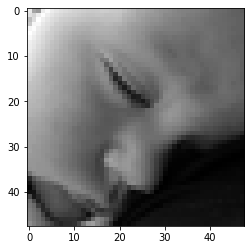

In [5]:
plt.ion()
f = plt.figure()
for i in tqdm(range(len(images))):
    im = images[i]
    im_data = np.array([np.uint8(val) for val in im.split(' ')]).reshape((48, 48))
    plt.clf()
    plt.imshow(im_data, cmap="gray")
    plt.savefig("./_temp.png")
    points = np.array(getLandmarks("./_temp.png"))
    if len(points) > 0: 
        x = points[:, 0]
        y = -points[:, 1]
        x_cm = np.mean(x)
        y_cm = np.mean(y)

        # center by the average
        x = x - x_cm
        y = y - y_cm

        xs.append(x)
        ys.append(y)
        labels.append(target[i])


In [7]:
xs = np.array(xs)
ys = np.array(ys) 

In [15]:
#d_xs= pd.DataFrame(xs, columns=['x_{}'.format(i) for i in range(len(xs[0]))])
#d_ys= pd.DataFrame(xs, columns=['y_{}'.format(i) for i in range(len(ys[0]))])
#d_labels = pd.DataFrame(labels, columns=['label'])
landmark_data = pd.DataFrame()

for i in tqdm(range(xs.shape[1])):
    landmark_data['x_{}'.format(i)] = xs[:, i]
    landmark_data['y_{}'.format(i)] = ys[:, i]

landmark_data['target'] = labels





100%|██████████| 68/68 [00:00<00:00, 595.84it/s]


In [16]:
landmark_data.describe()

,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,...,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67,target
count,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,...,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000
mean,-0.435410,0.222661,-0.429431,0.105320,-0.412437,-0.009317,-0.385777,-0.119490,-0.341571,-0.220299,...,-0.175001,0.140915,-0.182251,0.045438,-0.205269,0.000994,-0.210923,-0.043349,-0.206142,3.049335
std,0.073389,0.064486,0.068232,0.057149,0.066505,0.052284,0.065696,0.050502,0.060208,0.048720,...,0.029053,0.033105,0.030246,0.030239,0.028254,0.030334,0.028851,0.030634,0.028011,2.031198
min,-0.768242,-0.039152,-0.739966,-0.132942,-0.703257,-0.226557,-0.658352,-0.328819,-0.582085,-0.435501,...,-0.286550,0.026039,-0.283568,-0.093550,-0.331650,-0.135036,-0.344079,-0.170338,-0.330725,0.000000
25%,-0.481282,0.181268,-0.471440,0.069432,-0.453561,-0.042326,-0.428508,-0.150394,-0.381592,-0.250842,...,-0.194751,0.118027,-0.203317,0.028267,-0.223683,-0.015461,-0.229859,-0.062107,-0.224562,1.000000
50%,-0.437461,0.223845,-0.430372,0.106297,-0.412653,-0.008215,-0.386475,-0.118411,-0.342332,-0.219446,...,-0.175023,0.140249,-0.183034,0.045812,-0.204752,0.000649,-0.210313,-0.043853,-0.205345,3.000000
75%,-0.393713,0.264702,-0.389404,0.141913,-0.372340,0.023557,-0.345187,-0.087535,-0.303687,-0.189007,...,-0.155046,0.163308,-0.162560,0.063429,-0.186202,0.017744,-0.191509,-0.026374,-0.187152,5.000000
max,-0.106288,0.501977,-0.133505,0.347150,-0.136603,0.190817,-0.116464,0.083028,-0.103498,-0.019345,...,-0.072982,0.269701,-0.048036,0.159273,-0.097641,0.116056,-0.104646,0.082203,-0.102866,6.000000


In [18]:
landmark_data.to_csv('/media/john/Data/datasets/facial-expressions/facial_landmarks.csv')


let's add the pariwise distances to the datasetr


In [19]:
distances = []
for i in tqdm(range(xs.shape[0])): 
    d = {}
    for j in range(ys.shape[1]): 
        for k in range(xs.shape[1]): 
            if j < k: 
                d["{0},{1}".format(j, k)] = np.sqrt((xs[i, j]-xs[i, k])**2+(ys[i, j]-ys[i, k])**2)
    distances.append(d)

100%|██████████| 26553/26553 [03:38<00:00, 121.74it/s]


In [20]:
dist_df = pd.DataFrame(distances)

In [21]:
dist_df.describe()

,"0,1","0,2","0,3","0,4","0,5","0,6","0,7","0,8","0,9","0,10",...,"63,64","63,65","63,66","63,67","64,65","64,66","64,67","65,66","65,67","66,67"
count,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,...,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000,26553.000000
mean,0.118227,0.234484,0.347626,0.455292,0.555964,0.648621,0.735108,0.798760,0.847171,0.872511,...,0.099341,0.035498,0.063090,0.098968,0.103060,0.146772,0.189173,0.045150,0.089402,0.044940
std,0.014558,0.027576,0.038933,0.048508,0.056394,0.064372,0.071104,0.074376,0.073347,0.066840,...,0.031458,0.030030,0.024939,0.024326,0.034340,0.041057,0.045891,0.009378,0.018082,0.009241
min,0.058470,0.119829,0.179518,0.244604,0.314218,0.383151,0.438955,0.476439,0.523731,0.573681,...,0.001424,0.000030,0.013649,0.034249,0.001803,0.006011,0.011927,0.011344,0.028279,0.014404
25%,0.108985,0.217002,0.322989,0.424504,0.519783,0.607214,0.688824,0.750556,0.799753,0.830160,...,0.079257,0.010254,0.045062,0.082126,0.080148,0.119669,0.158712,0.038690,0.077110,0.038665
50%,0.118555,0.234916,0.347863,0.455167,0.555689,0.647873,0.733952,0.798436,0.847109,0.873160,...,0.098409,0.026596,0.055411,0.095004,0.100944,0.144693,0.187553,0.044927,0.088761,0.044506
75%,0.127953,0.252563,0.372931,0.486719,0.592649,0.690540,0.781950,0.847608,0.894604,0.915558,...,0.119406,0.055588,0.076628,0.111931,0.124959,0.173199,0.218791,0.051281,0.101074,0.050936
max,0.180196,0.351322,0.516114,0.668612,0.797659,0.930707,1.052071,1.134341,1.182139,1.205863,...,0.220661,0.203485,0.226880,0.249997,0.236162,0.308884,0.379528,0.082450,0.159046,0.081735


In [22]:
landmark_data.join(dist_df)

,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,...,"63,64","63,65","63,66","63,67","64,65","64,66","64,67","65,66","65,67","66,67"
0,-0.361885,0.335080,-0.386728,0.224464,-0.398756,0.110744,-0.387836,-0.001191,-0.356529,-0.103846,...,0.062529,0.008148,0.041225,0.077767,0.070583,0.103614,0.140187,0.033093,0.069880,0.038015
1,-0.434816,0.256265,-0.418404,0.129823,-0.390123,0.008268,-0.351564,-0.108422,-0.293719,-0.212471,...,0.109040,0.041550,0.069430,0.102239,0.129379,0.173443,0.210827,0.047436,0.090745,0.044419
2,-0.516714,0.275315,-0.516913,0.145745,-0.511237,0.016095,-0.484466,-0.106841,-0.427562,-0.204909,...,0.021168,0.005296,0.030629,0.058918,0.024900,0.048688,0.078055,0.025420,0.053996,0.029483
3,-0.395190,0.201027,-0.372570,0.086306,-0.341578,-0.019932,-0.310975,-0.121200,-0.273600,-0.220257,...,0.105785,0.014016,0.058116,0.103752,0.106247,0.161330,0.209041,0.055083,0.103237,0.049085
4,-0.403541,0.223896,-0.400538,0.119213,-0.391955,0.011448,-0.383610,-0.093439,-0.359848,-0.189248,...,0.094069,0.043715,0.064825,0.091647,0.089107,0.131186,0.168268,0.042081,0.079379,0.037884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26548,-0.431805,0.230261,-0.427210,0.115674,-0.410621,0.003644,-0.385127,-0.106340,-0.351549,-0.200867,...,0.107333,0.029198,0.043779,0.072904,0.101016,0.136772,0.172653,0.035764,0.071797,0.036173
26549,-0.430665,0.273707,-0.435900,0.152648,-0.423922,0.034017,-0.406926,-0.077023,-0.376530,-0.172103,...,0.082943,0.006964,0.032361,0.063891,0.081533,0.112641,0.144942,0.031477,0.063721,0.032316
26550,-0.385719,0.148835,-0.371583,0.045978,-0.344131,-0.057797,-0.309499,-0.157787,-0.258393,-0.247109,...,0.093643,0.020915,0.043653,0.072255,0.095277,0.131146,0.163317,0.035934,0.068540,0.032898
26551,-0.449453,0.221202,-0.462436,0.106291,-0.461007,-0.011399,-0.450873,-0.121879,-0.415810,-0.220654,...,0.105193,0.019638,0.047578,0.088008,0.107903,0.150057,0.191128,0.042765,0.083519,0.041093


In [23]:
landmark_data.to_csv('/media/john/Data/datasets/facial-expressions/facial_landmarks.csv')

# Machine-Learning Time!

In [24]:
# standard sci-kit learn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# classification models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.preprocessing import OrdinalEncoder # for categorical variables
from tqdm import tqdm # for progress bar
from sklearn.metrics import accuracy_score


import joblib # for pickeling models

In [27]:
# define the inputs as unique distances
inputs = dist_df.to_numpy()
dist_ids = dist_df.columns
print(inputs.shape)
print(dist_ids)
# there are 2 thousand unique distance pairs 
# and there are 26 thousand datapoints

(26553, 2278)
Index(['0,1', '0,2', '0,3', '0,4', '0,5', '0,6', '0,7', '0,8', '0,9', '0,10',
       ...
       '63,64', '63,65', '63,66', '63,67', '64,65', '64,66', '64,67', '65,66',
       '65,67', '66,67'],
      dtype='object', length=2278)


Set up a list of classifiers to try out

In [28]:
classifier_names = ["K_Nearest_Neighbors",
                    "Decision_Tree",
                    "Random_Forest",
                    "MLP_Neural_Net",
                    "AdaBoost",
                    "Naive_Bayes",
                    "Quadratic_Discriminant_Analysis",
                    "Linear_SVM",
                    "RBF_SVM",
                    "Gaussian_Process"]


# following example found at: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

classifiers = [
                KNeighborsClassifier(2),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                MLPClassifier(),
                AdaBoostClassifier(),
                GaussianNB(),
                QuadraticDiscriminantAnalysis(),
                SVC(kernel="linear"),
                SVC(),
                GaussianProcessClassifier()]


In [32]:
# break up dataset
X_train, X_test, y_train, y_test = train_test_split(inputs, landmark_data.loc[:, 'target'], test_size=.15, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(22570, 2278) (3983, 2278)
(22570,) (3983,)


In [ ]:
accuracy_dict = {}
#go through the models
with open('model_comparison.txt', 'w') as f:
    for k in tqdm(range(len(classifiers))):
        tqdm.write("Working on {}".format(classifier_names[k]))
        clf = classifiers[k]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # record accuracy
        accuracy = accuracy_score(y_test, y_pred)
        tqdm.write("\t accuracy: {}".format(accuracy))
        f.write("Model {0} fit with accuracy {1}\n".format(classifier_names[k], accuracy))

        accuracy_dict[classifier_names[k]] = accuracy

        # record confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure()
        plt.imshow(cm, cmap='Blues')
        target_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation='vertical')
        plt.yticks(tick_marks, target_names)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, "{0:.2f}%".format(100*(cm[i, j])/sum(cm[i,:])),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > (cm.max()/2) else "black")
        plt.savefig('./models/evaluation/{}-expression-model_confusion matrix.png'.format(classifier_names[k]), format='png')
        plt.title("{0}  Accuracy:{1}".format(classifier_names[k], round(accuracy, 5)))
        joblib.dump(clf, './models/{}.pkl'.format(classifier_names[k]))



for key in accuracy_dict:
    print(key, round(accuracy_dict[key], 5))

plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

Working on K_Nearest_Neighbors


  0%|          | 0/10 [06:25<?, ?it/s]

	 accuracy: 0.5719307054983681


 10%|█         | 1/10 [06:27<58:11, 387.97s/it]

Working on Decision_Tree


 10%|█         | 1/10 [12:24<58:11, 387.97s/it]

	 accuracy: 0.5992970123022847


 20%|██        | 2/10 [12:24<50:28, 378.60s/it]

Working on Random_Forest


 20%|██        | 2/10 [19:16<50:28, 378.60s/it]

	 accuracy: 0.6876726085864926


 30%|███       | 3/10 [19:17<45:23, 389.00s/it]

Working on MLP_Neural_Net


 30%|███       | 3/10 [29:38<45:23, 389.00s/it]

	 accuracy: 0.42656289229224204


 40%|████      | 4/10 [29:39<45:51, 458.63s/it]

Working on AdaBoost


 50%|█████     | 5/10 [41:17<44:12, 530.52s/it]

	 accuracy: 0.4112478031634446
Working on Naive_Bayes


 60%|██████    | 6/10 [41:18<24:46, 371.67s/it]

	 accuracy: 0.33642982676374594
Working on Quadratic_Discriminant_Analysis


/home/john/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
 60%|██████    | 6/10 [42:31<24:46, 371.67s/it]

	 accuracy: 0.64925935224705


 70%|███████   | 7/10 [42:32<14:06, 282.27s/it]

Working on Linear_SVM


 70%|███████   | 7/10 [1:12:35<14:06, 282.27s/it]

	 accuracy: 0.49158925433090633


 80%|████████  | 8/10 [1:12:36<24:37, 738.80s/it]

Working on RBF_SVM
